<a id="2"></a> 
<h1 style ="background:#333399;border:0;color:white" >Video Game Sales Analysis</h1>

###### <a id="2"></a> <h2 style ="background:#832244;border:0;color:white" >Loading and Preprocessing the Video Games Sales Data </h2>

<p style="text-indent: 25px;">
    <span style='font-family:Georgia'>
        This dataset contains a list of video games with sales greater than 100,000 copies. It was generated by a scrape of <a href= "https://www.vgchartz.com/gamedb/">vgchartz.com </a>
                </span>
</p>
<span style='font-family:Georgia'>
    <ul>
        <li><b>Rank</b> - Ranking of overall sales</li>
        <li><b>Name</b> - The games name</li>
        <li><b>Platform</b> - Platform of the games release (i.e. PC,PS4, etc.)</li>
        <li><b>Year</b> - Year of the game's release</li>
        <li><b>Genre</b> - Genre of the game</li>
        <li><b>Publisher</b> - Publisher of the game</li>
        <li><b>NA_Sales</b> - Sales in North America (in millions)</li>
        <li><b>EU_Sales</b> - Sales in Europe (in millions)</li>
        <li><b>JP_Sales</b> - Sales in Japan (in millions)</li>
        <li><b>Other_Sales</b> - Sales in the rest of the world (in millions)</li>
        <li><b>Global_Sales</b> - Total worldwide sales.</li>
    </ul>
</span>

In [1]:
#importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly as py
import plotly.express as px
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
from plotly.tools import FigureFactory as ff
from plotly.colors import n_colors
from plotly.subplots import make_subplots
from IPython.display import display, HTML


In [2]:
#Loading the csv dataset
df_vgsales= pd.read_csv("vgsales.csv")
df_vgsales.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [3]:
print("Database dimension     :",df_vgsales.shape)
print("Database size          :",df_vgsales.size)

Database dimension     : (16598, 11)
Database size          : 182578


In [4]:
df_vgsales.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [5]:
df_vgsales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [6]:
df_vgsales.isna().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [7]:
df_vgsales =df_vgsales.dropna()
df_vgsales.isna().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

<AxesSubplot:>

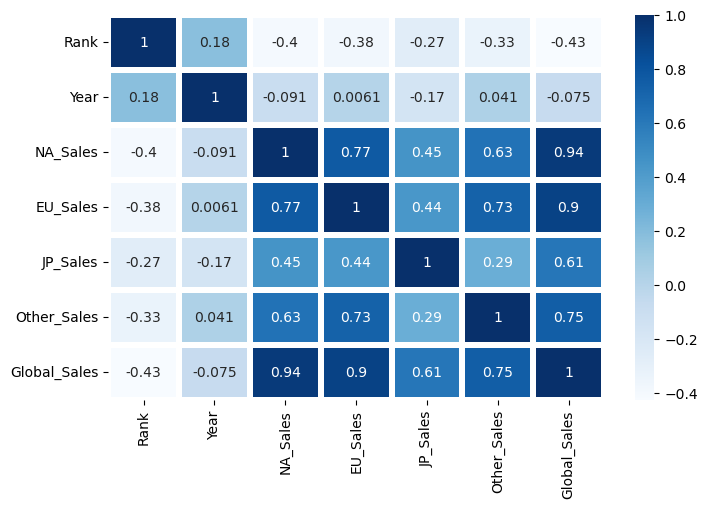

In [8]:
plt.figure(figsize=(8,5))
sns.heatmap(df_vgsales.corr(), cmap = "Blues", annot=True, linewidth=3)
#insight

######
<a id="2"></a> <h2 style ="background:#832244;border:0;color:white" >Exploratory Data Analysis</h2>

### Q1: How many unique publishers , games, platforms and Genres does the data contain?

In [9]:
games = df_vgsales['Name'].unique()
publisher = df_vgsales['Publisher'].unique()
platforms = df_vgsales['Platform'].unique()
genres = df_vgsales['Genre'].unique()

fig = go.Figure()
fig.add_trace(go.Indicator(
    mode = "number",
    value = len(games),
    title = {'text': "Games",'font': {'color': 'red','size':20}},
    number={'font':{'color': 'red','size':50}},
    domain = {'row': 0, 'column': 0}
))
fig.add_trace(go.Indicator(
    mode = "number",
    value = len(publisher),
    title = {'text': "Publishers",'font': {'color': 'green','size':20}},
    number={'font':{'color': 'green','size':50}},
    domain = {'row': 0, 'column': 1}
))

fig.add_trace(go.Indicator(
    mode = "number",
    value = len(platforms),
    title = {'text': "Platforms",'font': {'color': 'darkviolet','size':20}},
    number={'font':{'color': 'darkviolet','size':50}},
    domain = {'row': 0, 'column': 2}
))

fig.add_trace(go.Indicator(
    mode = "number",
    value = len(genres),
    title = {'text': "Genres",'font': {'color': 'blue','size':20}},
    number={'font':{'color': 'blue','size':50}},
    domain = {'row': 0, 'column': 3}
))

fig.update_layout(
    grid = {'rows': 1, 'columns': 4, 'pattern': "independent"})
fig.show()

### Q2 What's the Video Game Sales Contribution by Top Publishers.


In [10]:
pubwisegame =  df_vgsales.groupby('Publisher')['Name'].count().reset_index()
pubwisegame = pubwisegame.sort_values('Name',ascending=False).reset_index()
pubwisegame.drop("index",axis = 1,inplace=True)

fig = go.Figure()

# Add Traces

fig.add_trace(
    go.Bar(x=pubwisegame['Publisher'][:10],
           y=pubwisegame['Name'][:10],
           name="Top 10",
          marker={'color': pubwisegame['Name'][:10],'colorscale': 'Earth'}))
fig.add_trace(
    go.Bar(x=pubwisegame['Publisher'][:50],
           y=pubwisegame['Name'][:50],
           name="Top 50",
           marker={'color': pubwisegame['Name'][:50],'colorscale': 'Earth'},
           visible=False))
fig.add_trace(
    go.Bar(x=pubwisegame['Publisher'][:100],
           y=pubwisegame['Name'][:100],
           name="Top 100",
           marker={'color': pubwisegame['Name'][:100],'colorscale': 'Earth'},
           visible=False))

fig.add_trace(
    go.Bar(x=pubwisegame['Publisher'][:500],
           y=pubwisegame['Name'][:500],
           name="Top 500",
           marker={'color': pubwisegame['Name'][:500],'colorscale': 'Earth'},
           visible=False))

fig.add_trace(
    go.Bar(x=pubwisegame['Publisher'],
           y=pubwisegame['Name'],
           name="All",
           marker={'color': pubwisegame['Name'],'colorscale': 'Earth'},
               visible=False ))
fig.update_layout(
    updatemenus=[
        dict(
            type="buttons",
            direction="right",
            active=0,
            x=0.57,
            y=1.2,
            buttons=list([
                dict(label="Top 10",
                     method="update",
                     args=[{"visible": [True, False,False, False, False]},
                           {"title": "Top 10 Publishers"}]),
                dict(label="Top 50",
                     method="update",
                     args=[{"visible": [False,True, False, False, False]},
                           {"title": "Top 50 Publishers"}]),
                dict(label="Top 100",
                     method="update",
                     args=[{"visible": [False,False, True, False, False]},
                           {"title": "Top 100 Publishers"}]),
                dict(label="Top 500",
                     method="update",
                     args=[{"visible": [False,False, False, True, False]},
                           {"title": "Top 500 Publishers"}]),
                dict(label="All",
                     method="update",
                     args=[{"visible": [False,False, False, False, True]},
                           {"title": "All Publishers"}]),
            ]),
        )
    ])

# Set title
fig.update_layout(
    title_text="Publisher Wise Video Game Count",
    xaxis_domain=[0.05, 1.0]
)

fig.show()

### Q3: What genre games have been made the most?

In [11]:
vg_genre = df_vgsales.Genre.value_counts().reset_index()

# create trace1
trace1 = go.Bar(
                x = vg_genre['index'],
                y = vg_genre['Genre'],
                marker = dict(color = 'rgb(192, 240, 153)',
                              line=dict(color='rgb(0,0,0)',width=0.5)))
layout = go.Layout(title = 'The most have been made games genre ' , xaxis = dict(title = 'Genre'), yaxis = dict(title = 'Count'))
fig = go.Figure(data = [trace1], layout = layout)
fig.show()




# figure
fig = {
  "data": [
    {
      "values": vg_genre['Genre'],
      "labels": vg_genre['index'],
      "hoverinfo":"label+percent+value",
      "hole": .2,
      "type": "pie"
    },],
  "layout": {
        "title":"Genre Analysis",
        "title_x":0.47,     
    }
}
iplot(fig)


### Q4: Which are the top 20 platforms having largest sales?

In [12]:
# Video Game Sale by Platform
platform_wise_gamesale =  df_vgsales.groupby('Platform')['Global_Sales'].sum().reset_index().sort_values("Global_Sales",ascending=False)
platform_wise_gamesale = platform_wise_gamesale.reset_index()
platform_wise_gamesale.drop("index",axis = 1,inplace=True)

# Initialize figure
fig = go.Figure()

# Add Traces

fig.add_trace(
    go.Bar(x=platform_wise_gamesale['Platform'][:5],
           y=platform_wise_gamesale['Global_Sales'][:5],
           name="Top 5",
          marker={'color': platform_wise_gamesale['Global_Sales'][:5],'colorscale': 'Viridis'}))
fig.add_trace(
    go.Bar(x=platform_wise_gamesale['Platform'][:10],
           y=platform_wise_gamesale['Global_Sales'][:10],
           name="Top 10",
           marker={'color': platform_wise_gamesale['Global_Sales'][:10],'colorscale': 'Viridis'},
           visible=False))
fig.add_trace(
    go.Bar(x=platform_wise_gamesale['Platform'][:20],
           y=platform_wise_gamesale['Global_Sales'][:20],
           name="Top 20",
           marker={'color': platform_wise_gamesale['Global_Sales'][:20],'colorscale': 'Viridis'},
           visible=False))

fig.add_trace(
    go.Bar(x=platform_wise_gamesale['Platform'],
           y=platform_wise_gamesale['Global_Sales'],
           name="All",
           marker={'color': platform_wise_gamesale['Global_Sales'],'colorscale': 'Viridis'},
               visible=False ))
fig.update_layout(
    updatemenus=[
        dict(
            type="buttons",
            direction="right",
            active=0,
            x=0.57,
            y=1.2,
            buttons=list([
                dict(label="Top 5",
                     method="update",
                     args=[{"visible": [True, False,False, False]},
                           {"title": "Top 5 Platforms"}]),
                dict(label="Top 10",
                     method="update",
                     args=[{"visible": [False,True, False, False]},
                           {"title": "Top 10 Platforms"}]),
                dict(label="Top 20",
                     method="update",
                     args=[{"visible": [False,False, True,False]},
                           {"title": "Top 20 Platforms"}]),
                dict(label="All",
                     method="update",
                     args=[{"visible": [False,False, False,True]},
                           {"title": "All Platforms"}]),
            ]),
        )
    ])

# Set title
fig.update_layout(
    title_text="Platform Wise Video Game Sales",
    xaxis_domain=[0.05, 1.0]
)
fig.show()

### Q5: Which year had the highest game release worldwide?

In [13]:
yearwisegame =  df_vgsales.groupby('Year')['Name'].count().reset_index()
fig = go.Figure(go.Bar(x=yearwisegame['Year'],y=yearwisegame['Name'],
                       marker={'color': yearwisegame['Name'],'colorscale': 'Viridis'}))
fig.update_layout(title_text='Video Game Release by Year',xaxis_title="Year",yaxis_title="Number of Games Released")
fig.show()


<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>
        Game realese peaked in between the years 2008 to 2010.
    </span>    
</div>

### Q6: Which year had the highest sales worldwide? 




In [14]:
yearwisesale =  df_vgsales.groupby('Year')['Global_Sales'].sum().reset_index()
fig = go.Figure(go.Bar(x=yearwisesale['Year'],y=yearwisesale['Global_Sales'],
                       marker={'color': yearwisesale['Global_Sales'],'colorscale': 'Viridis'}))
fig.update_layout(title_text='Video Game Global Sales by Release Year',xaxis_title="Year",yaxis_title="Sum of Sales")
fig.show()

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>
        there is a close realtion between question 5 and 6 as they 
    </span>    
</div>

### Q7: In which years were the top ranked 100 games were released?

In [15]:
fig={
    "data" : [
    {
        'x': df_vgsales.Rank[0:100],
        'y': df_vgsales.Year[0:100],
        'mode': 'markers',
        'marker': {
            "color":df_vgsales.Global_Sales,
            'size': df_vgsales.Global_Sales,
            'showscale': True,
            "colorscale":'Blackbody'
        },
        "text" :  "Name:"+ df_vgsales.Name +","+" Publisher:" + df_vgsales.Publisher
        
    },
],
"layout":
    {
    "title":"Release Years of Top 100 Video Games According to Global Sales",
    "xaxis":{
        "title":"Rank",
        "gridcolor":'rgb(255, 255, 255)',
        "zerolinewidth":1,
        "ticklen":5,
        "gridwidth":2,
    },
    "yaxis":{
        "title":'Years',
        "gridcolor":'rgb(255, 255, 255)',
        "zerolinewidth":1,
        "ticklen":5,
        "gridwidth":2,
    },
    
    "paper_bgcolor":'rgb(243, 243, 243)',
    "plot_bgcolor":'rgb(243, 243, 243)'
    }}

iplot(fig)

  ###  Q8: What is  the Gobal Video Game sales Genre wise?

In [16]:
# Genre wise Game Sales
genre = df_vgsales.loc[:,['Genre','Global_Sales']]
genre['total_sales'] = genre.groupby('Genre')['Global_Sales'].transform('sum')
genre.drop('Global_Sales', axis=1, inplace=True)
genre = genre.drop_duplicates()

fig = px.pie(genre, names='Genre', values='total_sales', template='seaborn')
fig.update_traces(rotation=90, pull=[0.1,0.06,0.06,0.06,0.06], textinfo="percent+label")
fig.update_layout(title="Genre Wise Game Sales",title_x=0.5)
fig.show()

### Q9: What are top 10 Ranked Video Game by Region?

In [17]:
# Top 5 Videos Generated by Global Sales
EU = df_vgsales.pivot_table('EU_Sales', columns='Name', aggfunc='sum').T
EU = EU.sort_values(by='EU_Sales', ascending=False).iloc[0:5]
EU_games = EU.index

JP = df_vgsales.pivot_table('JP_Sales', columns='Name', aggfunc='sum').T
JP = JP.sort_values(by='JP_Sales', ascending=False).iloc[0:5]
JP_games = JP.index

NA = df_vgsales.pivot_table('NA_Sales', columns='Name', aggfunc='sum').T
NA = NA.sort_values(by='NA_Sales', ascending=False).iloc[0:5]
NA_games = NA.index

Other = df_vgsales.pivot_table('Other_Sales', columns='Name', aggfunc='sum').T
Other = Other.sort_values(by='Other_Sales', ascending=False).iloc[0:5]
Other_games = Other.index

In [18]:
# Initialize figure
fig = make_subplots(
    rows=2, cols=2, subplot_titles=("North Americal", "Europe", "Japan","Other"),
    column_widths=[30, 30],
    row_heights=[30, 30],
    specs=[[{"type": "bar"}, {"type": "bar"}],
           [ {"type": "bar"}, {"type": "bar"}]])
# Add Traces

fig.add_trace(
    go.Bar(y=NA['NA_Sales'],
           x=NA_games,
           name="North America",
          marker={'color': NA['NA_Sales'],'colorscale': 'Portland'})
         ,row=1, col=1)
fig.add_trace(
    go.Bar(y=EU['EU_Sales'],
           x=EU_games,
           name="Europe",
           marker={'color': EU['EU_Sales'],'colorscale': 'Portland'},
           ),row=1, col=2)
fig.add_trace(
    go.Bar(y=JP['JP_Sales'],
           x=JP_games,
           name="Japan",
           marker={'color': JP['JP_Sales'],'colorscale': 'Portland'},
           ),row=2, col=1)
fig.add_trace(
    go.Bar(y=Other['Other_Sales'],
           x=Other_games,
           name="Other",
           marker={'color': Other['Other_Sales'],'colorscale': 'Portland'},
           ),row=2, col=2)



fig.show()

### Q10: What are the total sales Year wise starting from 1980 to 2016?

C:\Users\vipul\AppData\Local\Temp\ipykernel_18952\1172106561.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\vipul\AppData\Local\Temp\ipykernel_18952\1172106561.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\vipul\AppData\Local\Temp\ipykernel_18952\1172106561.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

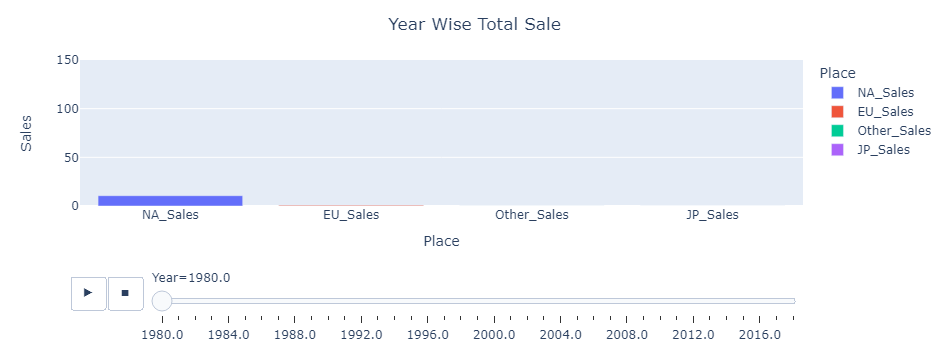

In [19]:
# Year wise total sale

perc = df_vgsales[["Year",'NA_Sales','EU_Sales','JP_Sales','Other_Sales']]
perc[['NA_mean','EU_mean','JP_mean','Other_mean']] = perc.groupby('Year')[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].transform('sum')
perc.drop(['NA_Sales','EU_Sales','JP_Sales','Other_Sales'], axis=1, inplace=True)
perc = perc.drop_duplicates()
perc = perc.sort_values("Year")
df = pd.DataFrame({'Place': ['NA_Sales']*perc.shape[0], 'Year':perc['Year'], 'Sales': perc['NA_mean']})
df1 = pd.DataFrame({'Place': ['EU_Sales']*perc.shape[0], 'Year':perc['Year'], 'Sales': perc['EU_mean']})
df2 = pd.DataFrame({'Place': ['JP_Sales']*perc.shape[0], 'Year':perc['Year'], 'Sales': perc['JP_mean']})
df3 = pd.DataFrame({'Place': ['Other_Sales']*perc.shape[0], 'Year':perc['Year'], 'Sales': perc['Other_mean']})
final = pd.concat([df,df1,df2,df3], axis=0)
final = final.sort_values("Year")
fig=px.bar(final,x='Place', y="Sales", animation_frame="Year",animation_group="Place", color="Place", hover_name="Place",range_y=[0,150])
fig.update_layout(title="Year Wise Total Sale",title_x=0.5)
fig.show()